In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Loading the dataset of Cifar10

In [2]:

(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
Y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
Y_train = Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Dear', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [7]:
def plot_sample(X, Y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X_train[index])
    plt.xlabel(classes[Y[index]])

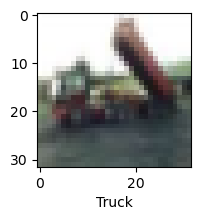

In [8]:
plot_sample(X_train, Y_train, 2)

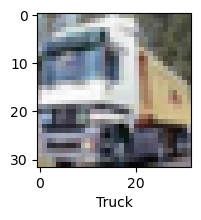

In [9]:
plot_sample(X_train, Y_train, 1)

Normalizing the traing Data

In [10]:
X_train = X_train / 255
X_test = X_test / 255

Bulding simple artificial Network for image classifications

In [11]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, Y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.8137 - accuracy: 0.3535
Epoch 2/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.6243 - accuracy: 0.4283
Epoch 3/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.5436 - accuracy: 0.4549
Epoch 4/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4835 - accuracy: 0.4768
Epoch 5/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.4323 - accuracy: 0.4952


Using 5 epochs  see that at the end , so the accuracy is at around 49%

In [13]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
Y_pred = ann.predict(X_test)
Y_pred_classes = [np.argmax(element) for element in Y_pred]

print("Classification Report: \n", classification_report(Y_test, Y_pred_classes))

313/313 [==============================] - 4s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.26      0.37      1000
           1       0.77      0.36      0.49      1000
           2       0.26      0.51      0.35      1000
           3       0.38      0.17      0.24      1000
           4       0.32      0.46      0.37      1000
           5       0.31      0.48      0.38      1000
           6       0.48      0.57      0.52      1000
           7       0.48      0.55      0.51      1000
           8       0.72      0.42      0.53      1000
           9       0.60      0.47      0.53      1000

    accuracy                           0.43     10000
   macro avg       0.50      0.43      0.43     10000
weighted avg       0.50      0.43      0.43     10000



 Now lets build a convolutional neural network to train our images

In [14]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [15]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
cnn.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 39s 24ms/step - loss: 1.4675 - accuracy: 0.4738
Epoch 2/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1043 - accuracy: 0.6136
Epoch 3/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9717 - accuracy: 0.6624
Epoch 4/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8796 - accuracy: 0.6959
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8108 - accuracy: 0.7185
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7541 - accuracy: 0.7382
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7050 - accuracy: 0.7557
Epoch 8/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6639 - accuracy: 0.7675
Epoch 9/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.6238 - accuracy: 0.7825
Epoch 10/10
1563/1563 [==============================] - 30s 19m

With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [17]:
cnn.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.9105 - accuracy: 0.7015


[0.910544753074646, 0.7014999985694885]

In [36]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 5ms/step


array([[8.95137084e-04, 1.15029223e-03, 2.96113361e-03, 8.20692301e-01,
        1.96212932e-04, 1.64061844e-01, 3.88365821e-04, 7.22952012e-04,
        8.83041136e-03, 1.01221034e-04],
       [2.67398939e-03, 7.45440200e-02, 7.18340459e-07, 7.81239784e-09,
        4.00056379e-08, 2.12005147e-09, 6.06229520e-08, 2.85408586e-10,
        9.22708929e-01, 7.22160912e-05],
       [1.67207032e-01, 2.78548449e-02, 4.18967335e-03, 2.42082751e-03,
        4.85881092e-03, 3.96210555e-04, 2.77748215e-04, 9.37425240e-04,
        7.63133824e-01, 2.87236478e-02],
       [9.43143845e-01, 5.49925817e-03, 3.69024579e-03, 2.24943782e-04,
        9.00912005e-03, 5.20770709e-06, 6.11956202e-05, 1.26683983e-04,
        3.82150784e-02, 2.44309140e-05],
       [2.01018229e-05, 9.33107003e-06, 7.46065751e-03, 6.28711581e-02,
        6.81774974e-01, 4.90111951e-03, 2.42865577e-01, 5.26820731e-05,
        3.19900028e-05, 1.24964890e-05]], dtype=float32)

In [37]:
Y_classes = [np.argmax(element) for element in y_pred]
Y_classes[:5]

[3, 8, 8, 0, 4]

In [38]:

Y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

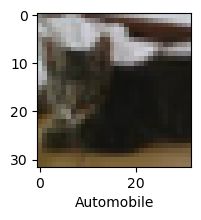

In [48]:
plot_sample(X_test, Y_test,9)

In [49]:
classes[Y_classes[9]]

'Automobile'